## Import Libraries & Load the data

In [50]:
import pandas as pd
import sklearn 
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl
import collections
from sklearn.preprocessing import MinMaxScaler
import pickle 
from sklearn.externals import joblib

In [69]:
df=pd.read_csv('loan_data.csv')

In [70]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [9]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


the standard deviations are high for some variables and variables are not equally scaled 

the df.info() method shows that we have some missing values, the object type variables need to be changed, we have almost 50 50 numeric versus cat variables

### EDA

In [20]:
gender=df.groupby('Gender').count()['Loan_Status']
gender=pd.DataFrame(data=gender)
gender.reset_index(inplace=True)
gender.head()

,Gender,Loan_Status
0,Female,112
1,Male,489


In [21]:
df.groupby('Loan_Status').count()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,,
N,192,187,192,186,192,183,192,192,181,186,179,192
Y,422,414,419,413,422,399,422,422,411,414,385,422


In [70]:
df.groupby('Married').count()['Gender']

Married
No     210
Yes    388
Name: Gender, dtype: int64

In [71]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

[Text(0,0,'Women'), Text(0,0,'Men')]

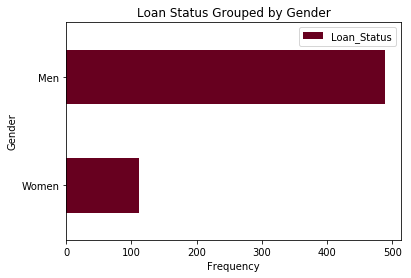

In [22]:
ax=gender.plot(kind='barh', colormap="RdGy")
ax.set_title('Loan Status Grouped by Gender')
ax.set_xlabel('Frequency')
ax.set_ylabel('Gender')
ax.set_yticklabels(['Women', 'Men'])

In [58]:
gender.Loan_Status.dtype

dtype('int64')

In [23]:
gender_status=pd.DataFrame(df.groupby(['Loan_Status', 'Gender']).count()['Married'])
gender_status.reset_index(inplace=True)
gender_status

,Loan_Status,Gender,Married
0,N,Female,37
1,N,Male,150
2,Y,Female,74
3,Y,Male,337


In [144]:
gender_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
Loan_Status    4 non-null category
Gender         4 non-null category
Married        4 non-null int64
dtypes: category(2), int64(1)
memory usage: 304.0 bytes


In [24]:
gender_status.Loan_Status=gender_status.Loan_Status.astype('category')
gender_status.Gender=gender_status.Gender.astype('category')

Text(0.5,1,'Loan Status Classes')

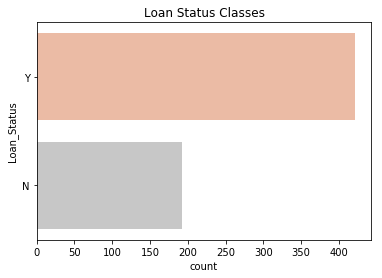

In [35]:
ax=sns.countplot(data=df, y='Loan_Status', palette="RdGy")
ax.set_title("Loan Status Classes")

Text(0.5,1,'Gender verus Loan Status')

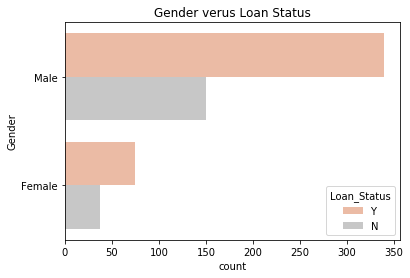

In [36]:
ax=sns.countplot(data=df, y='Gender', hue='Loan_Status', palette="RdGy")
ax.set_title('Gender verus Loan Status')

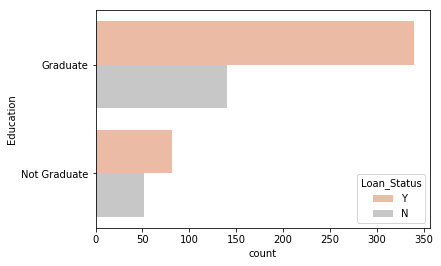

In [37]:
sns.countplot(data=df, y='Education', hue='Loan_Status', palette="RdGy")

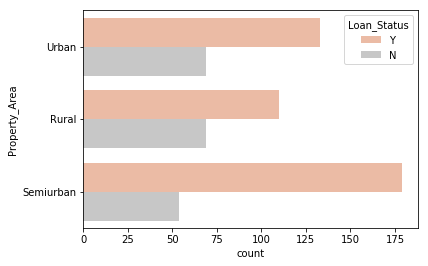

In [38]:
sns.countplot(data=df, y='Property_Area', hue='Loan_Status', palette="RdGy")

In [68]:
df.groupby(by=["Dependents", "Loan_Status"]).count()["Gender"]
#ax=df.Dependents.value_counts().plot(kind="barh", colormap="RdGy")
#ax.set_title("Number of Dependents")

Dependents  Loan_Status
0.0         N              104
            Y              234
1.0         N               36
            Y               65
2.0         N               23
            Y               76
3.0         N               18
            Y               30
Name: Gender, dtype: int64

In [165]:
df.columns

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History', u'Property_Area',
       u'Loan_Status'],
      dtype='object')

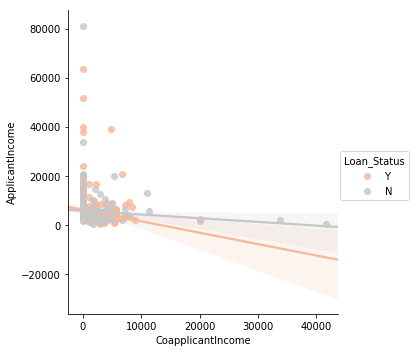

In [44]:
ax=sns.lmplot(x='CoapplicantIncome', y='ApplicantIncome', data=df, hue='Loan_Status', palette="RdGy")

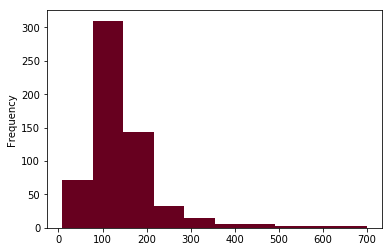

In [41]:
df.LoanAmount.plot(kind='hist', colormap="RdGy")

Text(0.5,1,'Distribution of Loan Term')

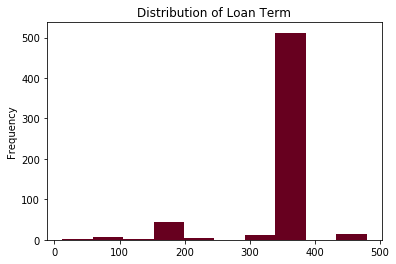

In [50]:
ax=df.Loan_Amount_Term.plot(kind='hist', colormap="RdGy")
ax.set_title('Distribution of Loan Term')

In [202]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

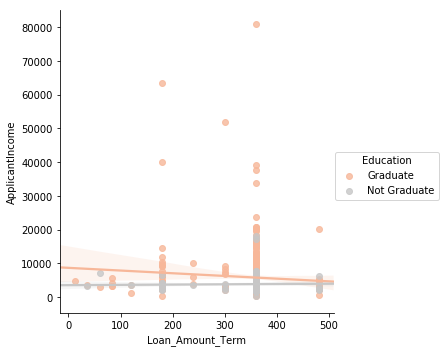

In [47]:
sns.lmplot(data=df, x='Loan_Amount_Term', y='ApplicantIncome', hue='Education', palette="RdGy")

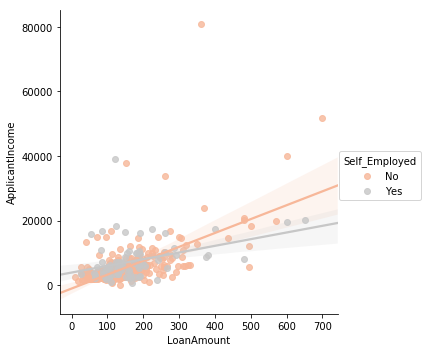

In [48]:
ax=sns.lmplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Self_Employed', palette="RdGy")
ax.set_titles("Competition on LoanAmounts By Employment Status")

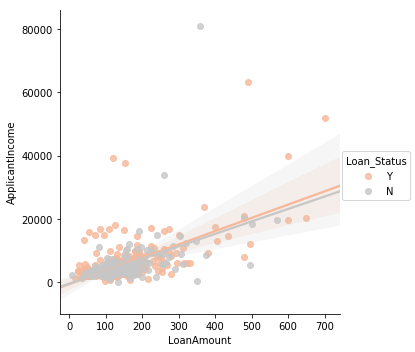

In [74]:
ax=sns.lmplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status', palette="RdGy")
ax.set_titles("Distribution of Income By Loan Status")

### Cleaning Up the data

In [61]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [71]:
df.dropna(inplace=True)

In [72]:
df.drop('Loan_ID', axis=1, inplace=True)

In [75]:
pd.get_dummies(df).groupby(['Loan_Status_Y', 'Loan_Status_N']).mean()

,,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_Status_Y,Loan_Status_N,,,,,,,,,,,,,,,,,
0,1,0.722973,5730.189189,1773.081081,153.378378,342.810811,0.574324,0.216216,0.783784,0.432432,0.567568,0.756757,0.243243,0.844595,0.155405,0.364865,0.283784,0.351351
1,0,0.801205,5201.093373,1495.508795,140.882530,341.710843,0.978916,0.162651,0.837349,0.316265,0.683735,0.816265,0.183735,0.870482,0.129518,0.256024,0.448795,0.295181


### Now we need to deal with imbalanced sampling

In [1]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 163kB 3.1MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [73]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [28]:
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [76]:
pre_y=df['Loan_Status']
pre_X=df.drop('Loan_Status', axis=1)
dm_X=pd.get_dummies(pre_X)
dm_y=pre_y.map(dict(Y=1, N=0))

In [80]:
dm_X.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [34]:
#Fitting the smote to the dataset to oversample the rejected class
smote=SMOTE(sampling_strategy='minority')
X1, y = smote.fit_sample(dm_X,dm_y)

In [31]:
Counter(y)
#check if this fixed the problem, and it did!

Counter({0: 332, 1: 332})

In [35]:

scaler=MinMaxScaler()

In [36]:
X=scaler.fit_transform(X1)

In [48]:

filename_x = "smote_scaled_x.pkl"
joblib.dump(X,filename_x)
filename_y = "smote_scaled_y.pkl"
joblib.dump(y,filename_y)
filename_scaler = "scaler_final.pkl"
joblib.dump(scaler,filename_scaler)

['scaler_final.pkl']